# 1. 학습데이터 준비

* Attribute Information:
        1) age(나이): age in years  
        2) sex(성별): (1 = male; 0 = female)
        3) cp(가슴 통증 타입): chest pain type
        4) trestbps(혈압): resting blood pressure (in mm Hg on admission to the hospital)
        5) choi(혈청 콜레스트롤): serum cholestoral in mg/dl
        6) fbs(공복 혈당): (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
        7) restecg(심전도): resting electrocardiographic results
        8) thalach(최대 심장박동 수): maximum heart rate achieved
        9) exang(운동 유도 협심증): exercise induced angina (1 = yes; 0 = no)
        10) oldpeak(노약): ST depression induced by exercise relative to rest
        11) slope: the slope of the peak exercise ST segment
        12) ca(혈관의 수): number of major ç (0-3) colored by flourosopy
        13) thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
        14) target: 1, 0

In [1]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('heart.csv')

In [2]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
column_name = dataset.columns

X = dataset[column_name[:-1]]
y = dataset[column_name[-1]]

In [5]:
print(set(y))

{0, 1}


## 1-2. 시각화 해보기

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\lhj90\anaconda3\envs\mlpractice\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\lhj90\anaconda3\envs\mlpractice\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


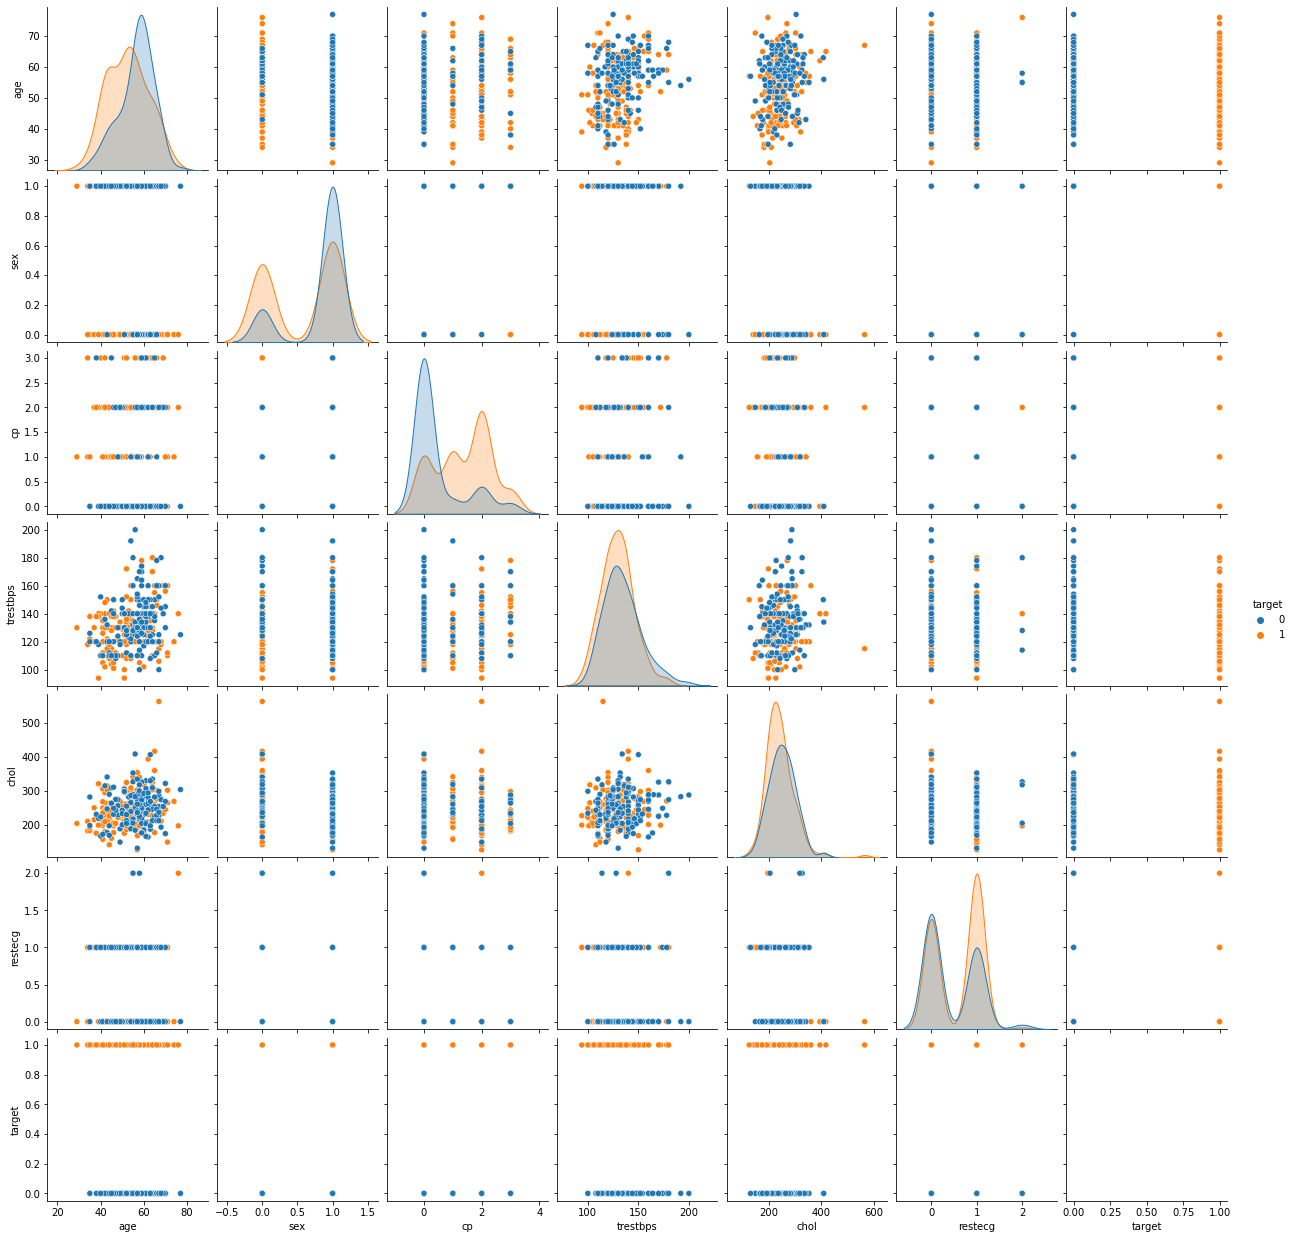

In [7]:
sns.pairplot(vars=["age", "sex", "cp", "trestbps", "chol", "restecg", "target"], 
             hue="target", data=dataset)
plt.show()

## 1-3. 학습, 평가데이터 나누기

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [11]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


## 1-4. 정규화  하기

#### Z score Normalization:  $\frac{X - \mu}{\sigma}$ 

#### min-max Normalization: $\frac{X - X_{min}}{X_{max} - X_{max}}$

In [12]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()

standardScaler.fit(X_train)

X_scaling_train = standardScaler.transform(X_train)
X_scaling_test = standardScaler.transform(X_test)

In [13]:
X_scaling_train

array([[-0.072269  ,  0.71758301,  0.95116563, ...,  0.96858908,
        -0.69232874,  1.11806421],
       [ 0.37229486, -1.393567  ,  0.95116563, ...,  0.96858908,
        -0.69232874, -0.55081105],
       [-0.85025576,  0.71758301, -0.9700943 , ...,  0.96858908,
        -0.69232874, -0.55081105],
       ...,
       [ 1.59484548,  0.71758301,  1.91179559, ..., -0.65639921,
         0.39714982, -0.55081105],
       [-0.96139672,  0.71758301, -0.9700943 , ...,  0.96858908,
        -0.69232874,  1.11806421],
       [ 0.92799969, -1.393567  , -0.00946433, ...,  0.96858908,
         1.48662838, -0.55081105]])

## 1-5. 데이터 tensor로 매핑하기

In [14]:
import torch 

X_train_tensor = torch.tensor(X_scaling_train, dtype=torch.float)
y_train = np.array(y_train)
y_train_tensor = torch.tensor(y_train, dtype=torch.float).reshape(-1, 1)

X_test_tensor = torch.tensor(X_scaling_test, dtype=torch.float)
y_test = np.array(y_test)
y_test_tensor = torch.tensor(y_test, dtype=torch.float).reshape(-1, 1)

# 2 모델 정의 (Logistic Regression)

In [15]:
import torch
import torch.nn as nn    ## Neural Net
import torch.nn.functional as F

class LogisticRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        # self.sigmoid = nn.Sigmoid()
    
    def forward(self, X):
        output = self.linear(X)
        # output = self.sigmoid(output)
        return output

model = LogisticRegression(13, 1)

In [16]:
X_train_tensor.shape

torch.Size([203, 13])

# Loss Function, Optimizer 정의

In [17]:
criterion = nn.BCEWithLogitsLoss() #내부에는 sigmoid가 들어가 있어 그래서 model에 sigmoid를 안써도 됌
#criterion = nn.BCELoss() # sigmoid X -> model에 sigmoid를 써줘야해  (BCELoss는 이진분류시 사용함)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# 학습하기

[0.8, 0.1, 0.1]

13개의 feature를 사용 13개의 feature를 바탕으로 1개의 예측값을 만들어야해 
사용한 weight matrix [13, 1] 

과연 어떤 feature의 weight가 가장클까? -> 가장 큰 weight를 가진 feature가 예측하는데 가장 중요한 부분을 차지한다

In [23]:
epochs = 20000
total = 0
correct = 0
model.train()
for epoch in range(epochs):
    total = 0
    correct = 0
    #X_ = X_train_tensor[:,5].unsqueeze(-1)
    
    prediction = model(X_train_tensor)
   
    loss = criterion(prediction, y_train_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    predicted = F.sigmoid(prediction).round()  ##모델 안에는 sigmoid가 포함되어있지만, data는 0~1사이 변환이 안되어있기 때문에 시그모이드화 해준다. 
    total += y_train_tensor.size(0)
    correct += (predicted == y_train_tensor).sum().item()
    
    if epoch % 100 == 0:
        print(f'Epoch[{epoch}/{epochs}] Loss:{round(loss.item(), 3)} Acc: {round(100 * correct / total, 3)}')

Epoch[0/20000] Loss:0.314 Acc: 87.685
Epoch[100/20000] Loss:0.314 Acc: 87.685
Epoch[200/20000] Loss:0.314 Acc: 87.685
Epoch[300/20000] Loss:0.314 Acc: 87.685
Epoch[400/20000] Loss:0.314 Acc: 87.685
Epoch[500/20000] Loss:0.314 Acc: 87.685
Epoch[600/20000] Loss:0.314 Acc: 87.685
Epoch[700/20000] Loss:0.314 Acc: 87.685
Epoch[800/20000] Loss:0.314 Acc: 87.685
Epoch[900/20000] Loss:0.314 Acc: 87.685
Epoch[1000/20000] Loss:0.314 Acc: 87.685
Epoch[1100/20000] Loss:0.314 Acc: 87.685
Epoch[1200/20000] Loss:0.313 Acc: 87.685
Epoch[1300/20000] Loss:0.313 Acc: 87.685
Epoch[1400/20000] Loss:0.313 Acc: 87.685
Epoch[1500/20000] Loss:0.313 Acc: 87.685
Epoch[1600/20000] Loss:0.313 Acc: 87.685
Epoch[1700/20000] Loss:0.313 Acc: 87.685
Epoch[1800/20000] Loss:0.313 Acc: 87.685
Epoch[1900/20000] Loss:0.313 Acc: 87.685
Epoch[2000/20000] Loss:0.313 Acc: 87.685
Epoch[2100/20000] Loss:0.313 Acc: 87.685
Epoch[2200/20000] Loss:0.313 Acc: 87.685
Epoch[2300/20000] Loss:0.313 Acc: 87.685
Epoch[2400/20000] Loss:0.313

# 테스트하기

In [24]:
total = 0
correct = 0
model.eval() ## 꼭 사용해야함. dropout, batch norm....

with torch.no_grad():  # gradient 계산이 안되게 막아줌 
    
    prediction = model(X_test_tensor)
    predicted = F.sigmoid(prediction).round()
    total += y_test_tensor.size(0)
    correct += (predicted == y_test_tensor).sum().item()
    
    print(f'Test Acc: {round(100 * correct / total, 3)}%')

Test Acc: 81.0%
